## epileptic seizure

In [13]:
from sklearn.datasets import load_breast_cancer
from main import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[0.8150724637681159, 0.8266666666666667]
[array([0.93779959]), array([0.81839389])]


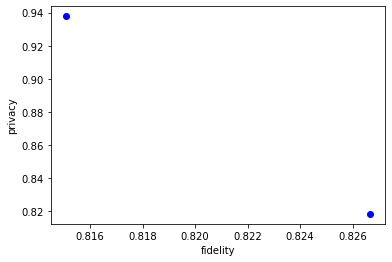

In [48]:
run = Main("D:/Datasets/epileptic/Epileptic_Seizure_Recognition.csv", 'y')

data, X, y = run.prepare_data(drop_columns='Unnamed')

run.train(data)

run.save_models('epileptic_seizure')

ctgan_samples, ctgan_X_syn, ctgan_y_syn  = run.generate('ctgan')
dpctgan_samples, dpctgan_X_syn, dpctgan_y_syn = run.generate('dpctgan')

ctgan_privacy = run.calculate_privacy(ctgan_samples, data)
dpctgan_privacy = run.calculate_privacy(dpctgan_samples, data)

ctgan_fidelity, _, _ = run.calculate_fidelity(X, y, ctgan_X_syn, ctgan_y_syn)
dpctgan_fidelity, _, _ = run.calculate_fidelity(X, y, dpctgan_X_syn, dpctgan_y_syn)


fidelity = [ctgan_fidelity, dpctgan_fidelity]
privacy = [ctgan_privacy, dpctgan_privacy]

print(fidelity)
print(privacy)
plt.scatter(fidelity, privacy, c ="blue")
plt.xlabel("fidelity")
plt.ylabel("privacy")
plt.show()



In [49]:
print("CTGAN Fidelity: ", ctgan_fidelity)
print("DPCTGAN Fidelity: ", dpctgan_fidelity)
print("CTGAN Privacy: ", ctgan_privacy)
print("DPCTGAN Privacy: ", dpctgan_privacy)

CTGAN Fidelity:  0.8150724637681159
DPCTGAN Fidelity:  0.8266666666666667
CTGAN Privacy:  [0.93779959]
DPCTGAN Privacy:  [0.81839389]
